In [126]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## logistic regression and data handling libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## neural network library
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix

# saving model
import pickle
import joblib

In [127]:
data = pd.read_csv("Medicaldataset.csv")
data.head()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [129]:
# assign 0 for negative and 1 for positive
data.insert(9, 'Outcome', np.ones(data.shape[0], dtype=int))

for i in range(data.shape[0]):
    if data.iloc[i,8] == 'negative':
        data.iloc[i,9] = 0

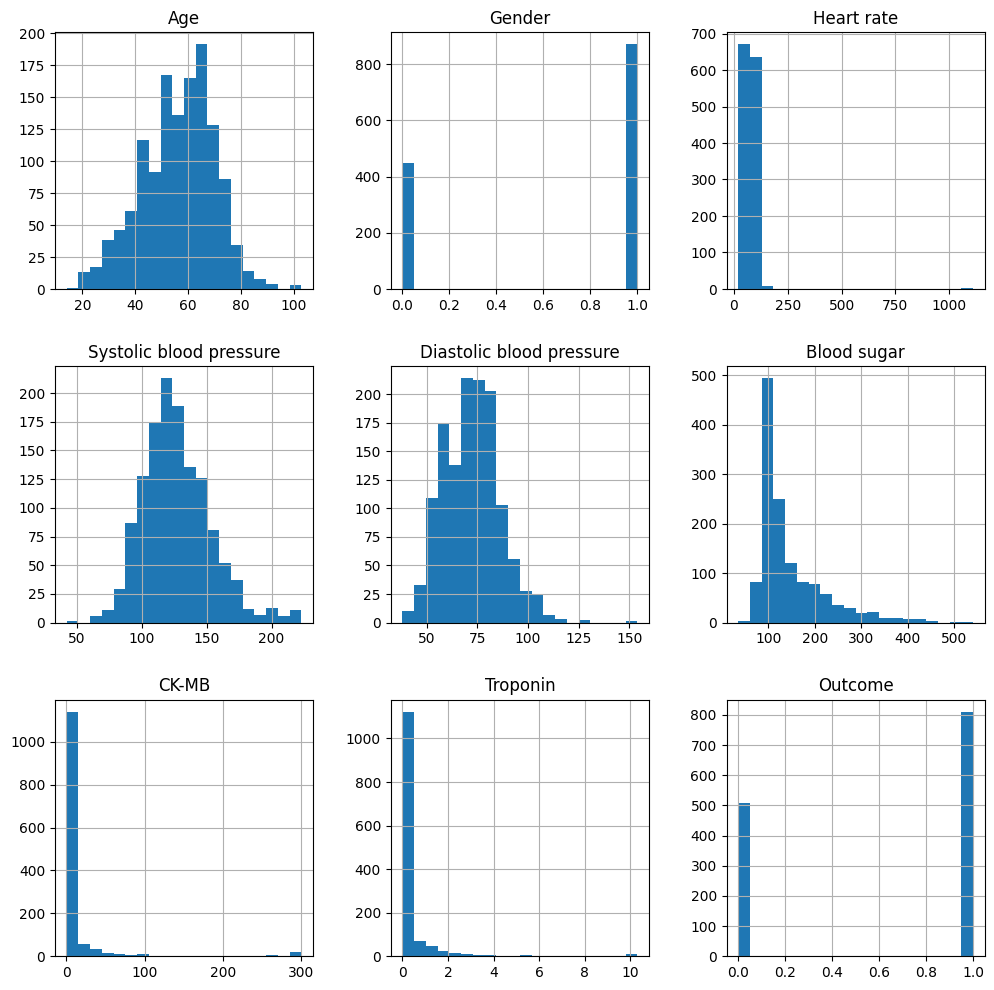

In [130]:
data.hist(bins=20, figsize=(12,12))
plt.savefig("heart_attack_plots/overall_hist_2.png")

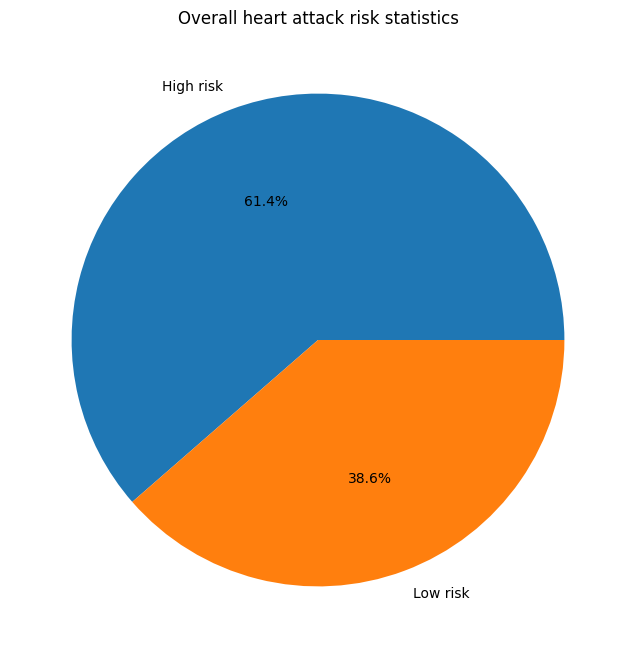

In [131]:
# pie chart showing overall poisonous statistics
fig, ax = plt.subplots(figsize=(8,8))
data['Outcome'].sum()
plt.pie([data['Outcome'].sum(), data.shape[0] - data['Outcome'].sum()], labels=['High risk', 'Low risk'], autopct='%1.1f%%')
ax.set_title("Overall heart attack risk statistics")
plt.savefig("heart_attack_plots/heart_risk_2.png")

Text(0.5, 1.0, 'Age Distribution by Risk')

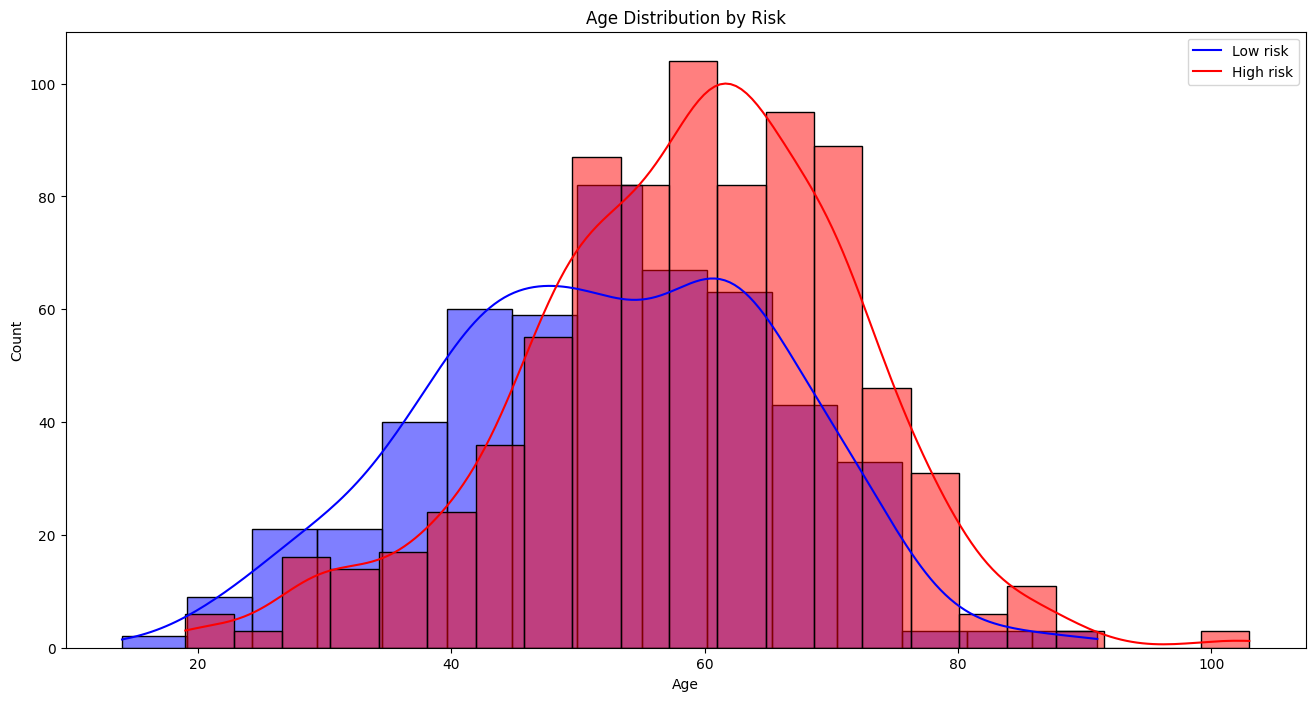

In [132]:
## Visualise the population age distribution between the high risk and low risk
plt.figure(figsize=(16,8))
ax = sns.histplot(data["Age"][data.Outcome == 0], color="blue", kde=True), sns.histplot(data["Age"][data.Outcome == 1], color="red", kde=True)
plt.legend(['Low risk', 'High risk'])
plt.xlabel('Age')
plt.title('Age Distribution by Risk')

Text(0.5, 1.0, 'Systolic blood pressure Distribution by Risk')

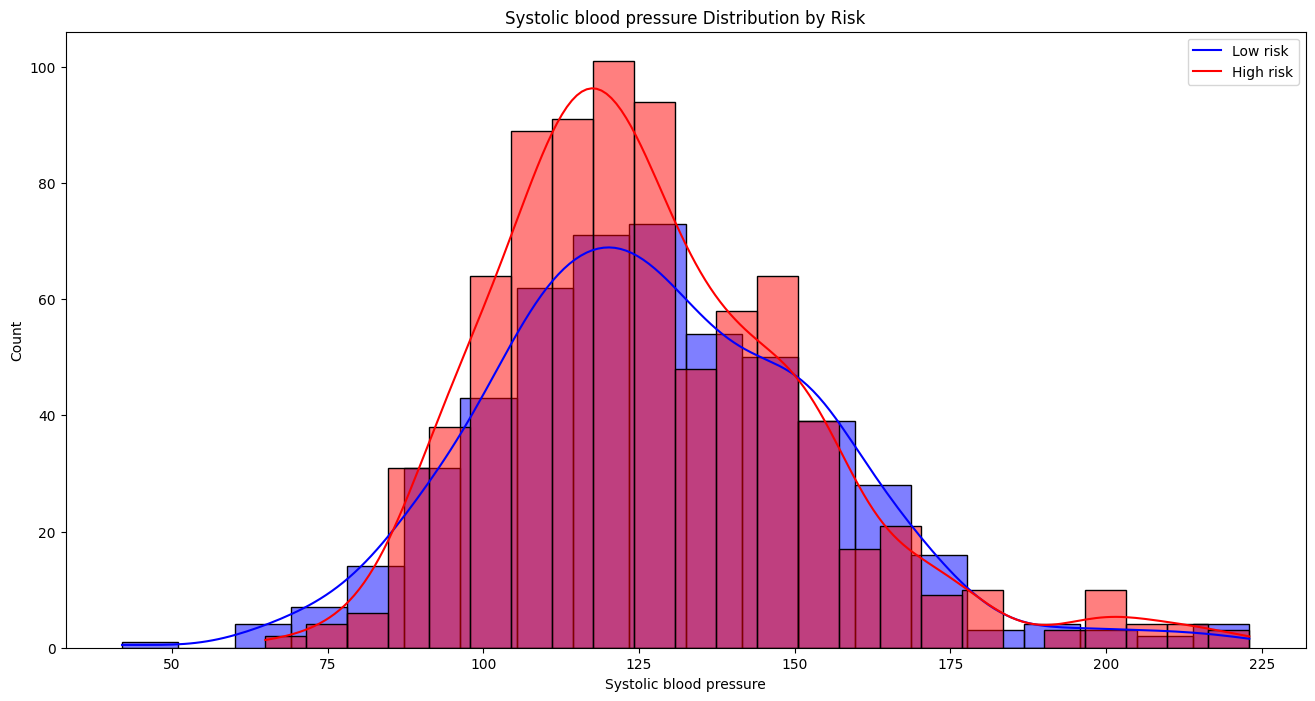

In [133]:
## Visualise the systolic blood pressure distribution between the high risk and low risk
plt.figure(figsize=(16,8))
ax = sns.histplot(data["Systolic blood pressure"][data.Outcome == 0], color="blue", kde=True), sns.histplot(data["Systolic blood pressure"][data.Outcome == 1], color="red", kde=True)
plt.legend(['Low risk', 'High risk'])
plt.xlabel('Systolic blood pressure')
plt.title('Systolic blood pressure Distribution by Risk')

Text(0.5, 1.0, 'Diastolic blood pressure Distribution by Risk')

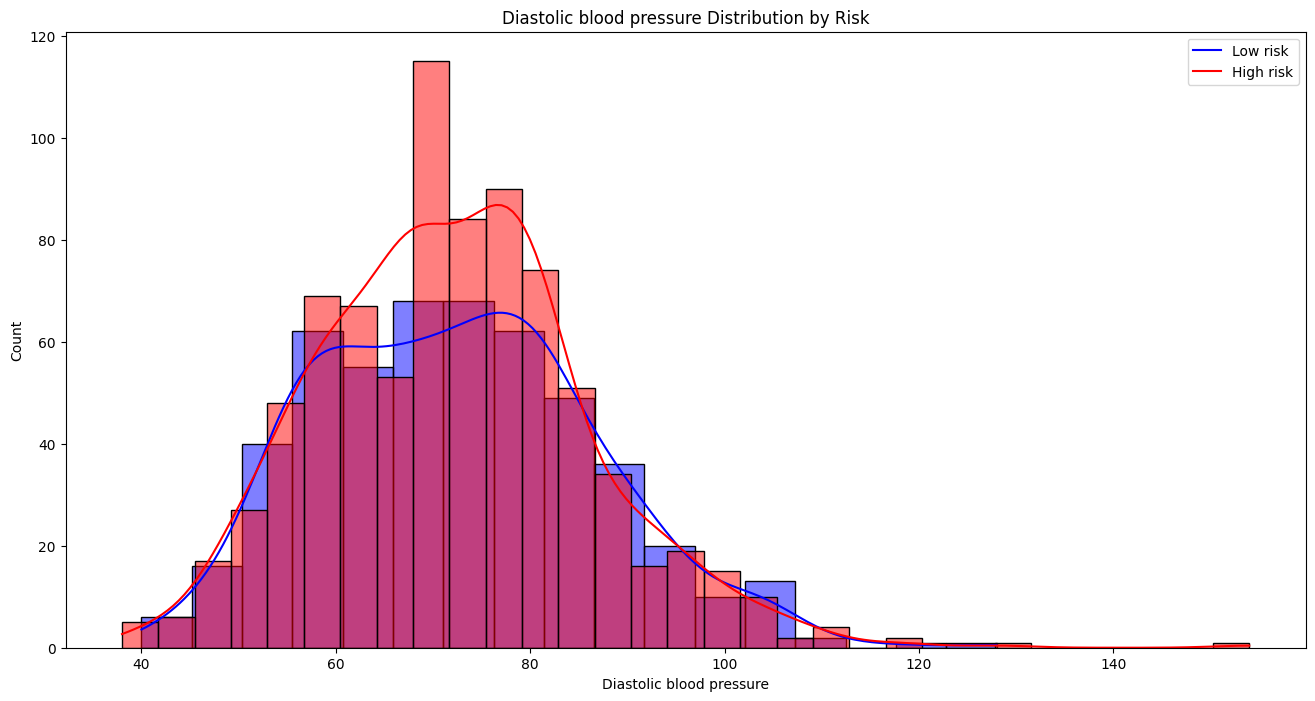

In [134]:
## Visualise the diastolic blood pressure distribution between the high risk and low risk
plt.figure(figsize=(16,8))
ax = sns.histplot(data["Diastolic blood pressure"][data.Outcome == 0], color="blue", kde=True), sns.histplot(data["Diastolic blood pressure"][data.Outcome == 1], color="red", kde=True)
plt.legend(['Low risk', 'High risk'])
plt.xlabel('Diastolic blood pressure')
plt.title('Diastolic blood pressure Distribution by Risk')

Text(0.5, 1.0, 'Blood sugar Distribution by Risk')

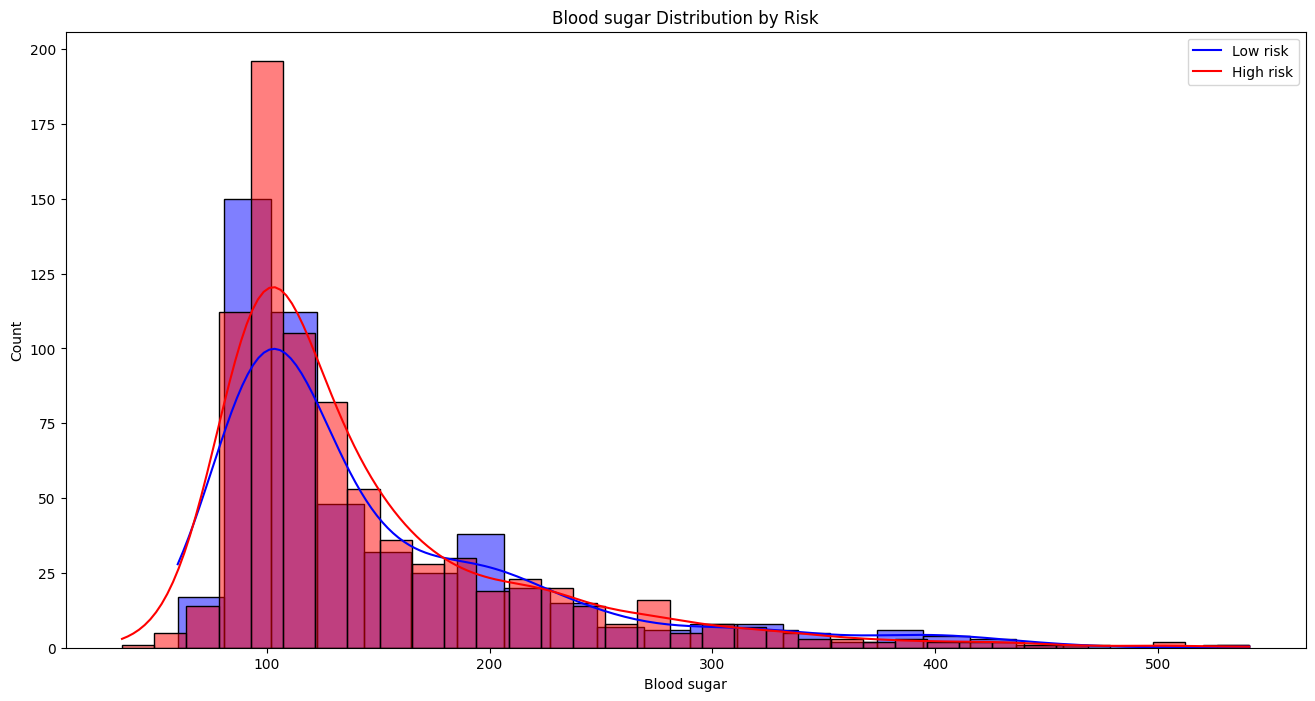

In [135]:
## Visualise the blood sugar distribution between the high risk and low risk
plt.figure(figsize=(16,8))
ax = sns.histplot(data["Blood sugar"][data.Outcome == 0], color="blue", kde=True), sns.histplot(data["Blood sugar"][data.Outcome == 1], color="red", kde=True)
plt.legend(['Low risk', 'High risk'])
plt.xlabel('Blood sugar')
plt.title('Blood sugar Distribution by Risk')

In [136]:
# data standardisation and splitting
data_to_use = data.iloc[:,0:8]
data_to_target = data.iloc[:,9]

# split data 20% for testing 80% for training
x_train, x_test, y_train, y_test = train_test_split(data_to_use, data_to_target, test_size=0.2, random_state=5) 

# normalise data to fit mean 0 variance 1
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# create statistics dataframe to store accuracy and runtime etc.
acc_db = pd.DataFrame(columns=['Accuracy', 'Run Time (s)'])

In [137]:
# Logistic regression model
start = time.time()
log_reg = LogisticRegression()
# train the model
log_reg.fit(x_train, y_train)
# test model on test data
y_pred_log = log_reg.predict(x_test)
# measure runtime of model
run_time = time.time() - start

db = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log})

acc_db.loc['Logistic regression'] = [metrics.accuracy_score(y_test,y_pred_log), run_time]

acc_db

,Accuracy,Run Time (s)
Logistic regression,0.780303,0.0065


In [138]:
# Gaussian naive bayes model

start = time.time()
gnb = GaussianNB()
# train the model
gnb.fit(x_train,y_train)
# test model on test data
y_pred_gnb = gnb.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction to dataframe
df_gnb = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_gnb})

acc_db.loc['Gaussian naive Bayes'] = [metrics.accuracy_score(y_test, y_pred_gnb), run_time]

acc_db

,Accuracy,Run Time (s)
Logistic regression,0.780303,0.0065
Gaussian naive Bayes,0.534091,0.0020


In [139]:
# find best k for knn model
bestacc = 0
for k in range(30):
    knn_model = KNeighborsClassifier(n_neighbors=k+1)
    knn_model.fit(x_train, y_train)
    y_pred_knn = knn_model.predict(x_test)
    if metrics.accuracy_score(y_test, y_pred_knn) > bestacc:
        bestk = k+1
        bestacc = metrics.accuracy_score(y_test, y_pred_knn)

# kNN model best number of neighbours

start = time.time()
knn_model = KNeighborsClassifier(n_neighbors=bestk)
# train the model
knn_model.fit(x_train, y_train)
# test model on test data
y_pred_knn = knn_model.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction to dataframe
df_knn = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_knn})

acc_db.loc['k Neighbours k='+str(bestk)] = [metrics.accuracy_score(y_test, y_pred_knn), run_time]

acc_db

,Accuracy,Run Time (s)
Logistic regression,0.780303,0.006500
Gaussian naive Bayes,0.534091,0.002000
k Neighbours k=29,0.696970,0.023998


In [140]:
# support vector with variable kernel - options: {‘linear’, 'poly', ‘rbf’, ‘sigmoid’}
start = time.time()
kernel = 'linear'
svr = svm.SVC(kernel=kernel, degree=4)
# train the model
svr.fit(x_train,y_train)
# test model on test data
y_pred_svr = svr.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction and actual to database
db_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})

# add statistics to database
acc_db.loc['Support Vector kernel='+kernel] = [metrics.accuracy_score(y_test, y_pred_svr), run_time]

start = time.time()
kernel = 'poly'
svr = svm.SVC(kernel=kernel, degree=4)
# train the model
svr.fit(x_train,y_train)
# test model on test data
y_pred_svr = svr.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction and actual to database
db_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})

# add statistics to database
acc_db.loc['Support Vector kernel='+kernel] = [metrics.accuracy_score(y_test, y_pred_svr), run_time]

start = time.time()
kernel = 'rbf'
svr = svm.SVC(kernel=kernel, degree=4)
# train the model
svr.fit(x_train,y_train)
# test model on test data
y_pred_svr = svr.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction and actual to database
db_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})

# add statistics to database
acc_db.loc['Support Vector kernel='+kernel] = [metrics.accuracy_score(y_test, y_pred_svr), run_time]

start = time.time()
kernel = 'sigmoid'
svr = svm.SVC(kernel=kernel, degree=4)
# train the model
svr.fit(x_train,y_train)
# test model on test data
y_pred_svr = svr.predict(x_test)
# measure runtime of model
run_time = time.time() - start

# add prediction and actual to database
db_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})

# add statistics to database
acc_db.loc['Support Vector kernel='+kernel] = [metrics.accuracy_score(y_test, y_pred_svr), run_time]

acc_db


,Accuracy,Run Time (s)
Logistic regression,0.780303,0.006500
Gaussian naive Bayes,0.534091,0.002000
k Neighbours k=29,0.696970,0.023998
Support Vector kernel=linear,0.784091,0.037000
Support Vector kernel=poly,0.678030,0.039501
Support Vector kernel=rbf,0.757576,0.050502
Support Vector kernel=sigmoid,0.689394,0.034996


In [141]:
# decision tree classifier models with variable depth and criterion
start = time.time()
decisionTree_model_gini = DecisionTreeClassifier(random_state=4000)
# train the model
decisionTree_model_gini.fit(x_train,y_train)
# test model on test data
y_pred_gini = decisionTree_model_gini.predict(x_test)
# measure runtime of model
run_time = time.time() - start

acc_db.loc['Decision tree'] = [metrics.accuracy_score(y_test, y_pred_gini), run_time]

start = time.time()
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy", random_state=4000)
# train the model
decisionTree_model_entropy.fit(x_train,y_train)
# test model on test data
y_pred_entropy = decisionTree_model_entropy.predict(x_test)
# measure runtime of model
run_time = time.time() - start

acc_db.loc['Decision tree entropy'] = [metrics.accuracy_score(y_test, y_pred_entropy), run_time]

start = time.time()
decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)
# train the model
decisionTree_model_depth3.fit(x_train,y_train)
# test model on test data
y_pred_depth3 = decisionTree_model_depth3.predict(x_test)
# measure runtime of model
run_time = time.time() - start

acc_db.loc['Decision tree depth=3'] = [metrics.accuracy_score(y_test, y_pred_depth3), run_time]

acc_db


,Accuracy,Run Time (s)
Logistic regression,0.780303,0.006500
Gaussian naive Bayes,0.534091,0.002000
k Neighbours k=29,0.696970,0.023998
Support Vector kernel=linear,0.784091,0.037000
Support Vector kernel=poly,0.678030,0.039501
Support Vector kernel=rbf,0.757576,0.050502
Support Vector kernel=sigmoid,0.689394,0.034996
Decision tree,0.992424,0.003999
Decision tree entropy,0.992424,0.004003
Decision tree depth=3,0.984848,0.004000


In [142]:
# random forest classifier with variable n
start = time.time()
n = 100
rfc = RandomForestClassifier(n_estimators=n)
# train the model
rfc.fit(x_train,y_train)
# test model on test data
y_pred_rfc = rfc.predict(x_test)
# measure runtime of model
run_time = time.time() - start

acc_db.loc['Random Forest n='+str(n)] = [metrics.accuracy_score(y_test, y_pred_depth3), run_time]

acc_db

,Accuracy,Run Time (s)
Logistic regression,0.780303,0.006500
Gaussian naive Bayes,0.534091,0.002000
k Neighbours k=29,0.696970,0.023998
Support Vector kernel=linear,0.784091,0.037000
Support Vector kernel=poly,0.678030,0.039501
Support Vector kernel=rbf,0.757576,0.050502
Support Vector kernel=sigmoid,0.689394,0.034996
Decision tree,0.992424,0.003999
Decision tree entropy,0.992424,0.004003
Decision tree depth=3,0.984848,0.004000


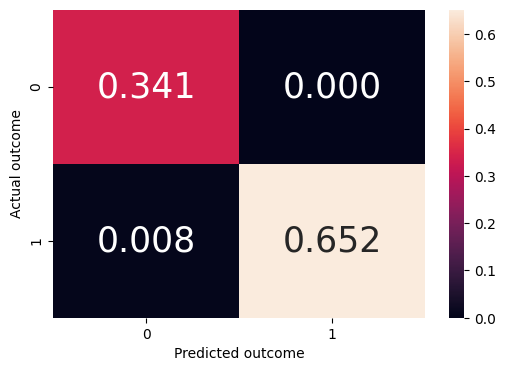

In [ ]:
# confusion matrix for best logistic regression model
conf_mat_gini = confusion_matrix(y_test, y_pred_gini)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(conf_mat_gini/np.sum(conf_mat_gini), annot=True, fmt='.3f', annot_kws = {'size':25})
ax.set_ylabel("Actual outcome")
ax.set_xlabel("Predicted outcome")
plt.savefig("heart_attack_plots/confusion_matrix_gini_2.png")

In [144]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       1.00      0.99      0.99       174

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264



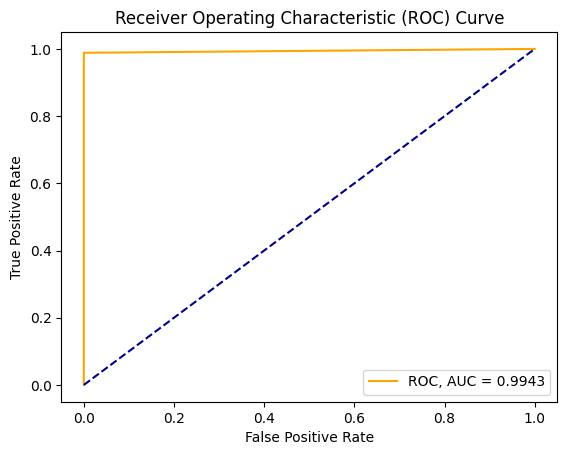

In [145]:
fpr, tpr = roc_curve(y_test, y_pred_gini)[0:2]
auc = roc_auc_score(y_test, y_pred_gini)

plt.plot(fpr, tpr, color='orange', label=f'ROC, AUC = {round(auc,4)}')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

Epoch 1/80


c:\Users\aferg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5582 - loss: 0.6909 - val_accuracy: 0.6477 - val_loss: 0.6724
Epoch 2/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6574 - loss: 0.6554 - val_accuracy: 0.7311 - val_loss: 0.5818
Epoch 3/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7176 - loss: 0.5755 - val_accuracy: 0.7462 - val_loss: 0.5271
Epoch 4/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7457 - loss: 0.5330 - val_accuracy: 0.7576 - val_loss: 0.4857
Epoch 5/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7769 - loss: 0.4967 - val_accuracy: 0.7879 - val_loss: 0.4460
Epoch 6/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7774 - loss: 0.4734 - val_accuracy: 0.8068 - val_loss: 0.4285
Epoch 7/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8104 - loss: 0.4430 - val_accuracy: 0.8220 - val_loss: 0.4139
Epoch 8/80
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7991 - loss: 0.4238 - val_accuracy: 0.7992 - val_loss: 0.4054
Epo

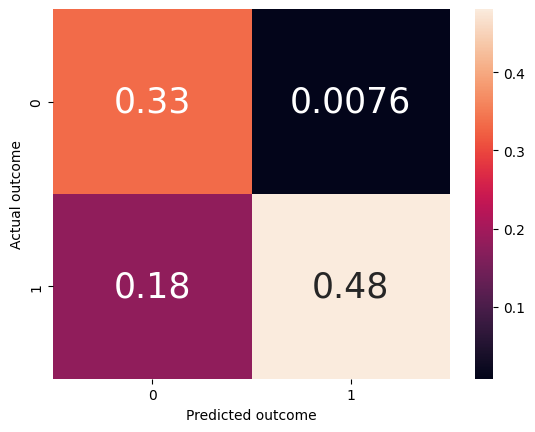

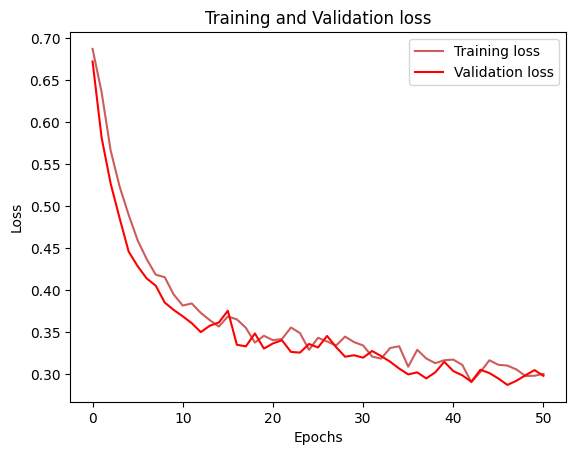

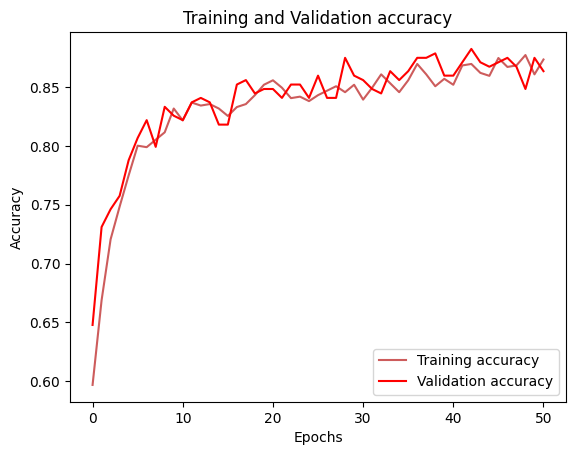

In [ ]:
## neural network
start = time.time()
model = Sequential()

##set up the layers
## input layer
model.add(Dense(units= 50, kernel_initializer= 'uniform', activation = 'tanh', input_dim = 8)) 
## hidden layer 1 
model.add(Dense(units= 10, kernel_initializer= 'uniform', activation = 'tanh')) 
##regularization 1
#model.add(Dropout(0.4)) # setting 40% of the data to zero to avoid overfitting
## hidden layer 2
#model.add(Dense(units= 20, kernel_initializer= 'uniform', activation = 'leaky_relu')) 
## regularization 2
model.add(Dropout(0.4)) # another regularisation to avoid overfitting
## output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid')) 

## compiling the ANN
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

## train the model with early stopping after enough consecutive epochs without improvement in loss
callback = EarlyStopping(monitor='loss', patience=8)
history = model.fit(x_train, y_train, batch_size = 15, epochs = 80, validation_split=0.25, callbacks=[callback])

## test the model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
run_time = time.time() - start

print(f"Total run time is: {run_time}")
history_df = pd.DataFrame(history.history)

# confusion matrix for neural network
fig1 = plt.subplots()
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})
plt.ylabel("Actual outcome")
plt.xlabel("Predicted outcome")
plt.savefig("heart_attack_plots/confusion_matrix_ann_2.png")

print(classification_report(y_test, y_pred))

# plot of training and validation loss
fig2 = plt.subplots()
plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.savefig("heart_attack_plots/loss_chart_2.png")

# Training and validation accuracy plot
fig3 = plt.subplots()
plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("heart_attack_plots/accuracy_chart_2.png")